In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import ast
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("Homestays_Data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
print("The dataset has \nrows :- {}\ncolumns :- {}".format(df.shape[0],df.shape[1]))

The dataset has 
rows :- 74111
columns :- 29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

After seen the info() we observe that there are some missing values in our data.

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
da= df.copy()

In [8]:
da.shape

(74111, 29)

# Drop Columns which are not important :
These are those columns who doesn't effect the log_price of any place in real life.

 **id, host_has_profile_pic, host_identity_verified, name,thumbnail_ur, 'zipcode' ,host_response_rate & instant_bookable**
<ul>
  <li>id: A unique identifier for the listing.</li>
  <li>host_has_profile_pic: Indicates whether the host has a profile picture.</li>
  <li>host_identity_verified: Indicates whether the host's identity has been verified.</li>
  <li>name: Represents the name or title of the property.
  <ul>I know that lots of property names are very famous, but in real life location and neighbour surrounding is more important to the client not just the name.</ul>
  </li>
  <li>thumbnail_url: Provides the URL of the thumbnail image for the property.</li>
  <li>zipcode: Specifies the zip code of the property's location.
  <li>host_response_rate:Represents the response rate of the host to inquiries.</li>
  <li>instant_bookable: Indicates whether instant booking is available for the property.</li>

</ul>

In [9]:
da.drop(['id', 'host_has_profile_pic', 'host_identity_verified', 'name','thumbnail_url', 'zipcode' ,'host_response_rate','instant_bookable'], axis=1,inplace=True)

In [10]:
da.shape

(74111, 21)

In [11]:
da.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,first_review,host_since,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,18-06-2016,26-03-2012,18-07-2016,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,05-08-2017,19-06-2017,23-09-2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,30-04-2017,25-10-2016,14-09-2017,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,19-04-2015,NaN,37.772004,-122.431619,Lower Haight,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,12-05-2015,01-03-2015,22-01-2017,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0


In [12]:
# drop dupicates
da.drop_duplicates(inplace=True)


In [13]:
da.shape

(74111, 21)

There is no dupicate values

Looking for the missing values in every columns

In [14]:
# Get the number of non-null values in each column
non_null_counts = da.count()

# Create a DataFrame to store the information
output_df = pd.DataFrame({
    'Dtype': da.dtypes,
    'Null Count': da.shape[0] - non_null_counts
})

# Print the formatted output
print(output_df)

                        Dtype  Null Count
log_price             float64           0
property_type          object           0
room_type              object           0
amenities              object           0
accommodates            int64           0
bathrooms             float64         200
bed_type               object           0
cancellation_policy    object           0
cleaning_fee             bool           0
city                   object           0
description            object           0
first_review           object       15864
host_since             object         188
last_review            object       15827
latitude              float64           0
longitude             float64           0
neighbourhood          object        6872
number_of_reviews       int64           0
review_scores_rating  float64       16722
bedrooms              float64          91
beds                  float64         131


Find the unique values in categorical columns

In [15]:
# Filter columns with data type 'object'
object_columns = da.select_dtypes(include=['object'])

# Count unique values in columns with data type 'object'
unique_value_counts_object = object_columns.nunique()

# Print the count of unique values in columns with data type 'object'
print("Count of unique values in columns with data type 'object':")
print(unique_value_counts_object)

Count of unique values in columns with data type 'object':
property_type             35
room_type                  3
amenities              67122
bed_type                   5
cancellation_policy        5
city                       6
description            73474
first_review            2554
host_since              3087
last_review             1371
neighbourhood            619
dtype: int64


Aftrer see the whole data we observe that the columns: **first_review ,host_since & last_review**  are datatime format. That means the given datatype of these columns are not object. We have to convert there datatype to datetime

In [16]:
da["last_review"] = pd.to_datetime(da["last_review"])
da["first_review"] = pd.to_datetime(da["first_review"])
da["host_since"] = pd.to_datetime(da["host_since"])

C:\Users\kirito\AppData\Local\Temp\ipykernel_3316\4186893687.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  da["last_review"] = pd.to_datetime(da["last_review"])
C:\Users\kirito\AppData\Local\Temp\ipykernel_3316\4186893687.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  da["first_review"] = pd.to_datetime(da["first_review"])
C:\Users\kirito\AppData\Local\Temp\ipykernel_3316\4186893687.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  da["host_since"] = pd.to_datetime(da["host_since"])


In [17]:
# Filter columns with data type 'object'
object_columns = da.select_dtypes(include=['object'])

# Count unique values in columns with data type 'object'
unique_value_counts_object = object_columns.nunique()

# Print the count of unique values in columns with data type 'object'
print("Count of unique values in columns with data type 'object':")
print(unique_value_counts_object)

Count of unique values in columns with data type 'object':
property_type             35
room_type                  3
amenities              67122
bed_type                   5
cancellation_policy        5
city                       6
description            73474
neighbourhood            619
dtype: int64


In [18]:
#drop missing values from neighbourhood
da.dropna(subset=['neighbourhood'], inplace=True)

# Data Visualization/Feature Engineering on categorical data


In [19]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=da, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

In [20]:
#count the property_type

da['property_type'].value_counts()


property_type
Apartment             45788
House                 13828
Condominium            2396
Townhouse              1490
Loft                   1153
Other                   548
Guesthouse              437
Bed & Breakfast         402
Bungalow                310
Dorm                    127
Guest suite             120
Villa                   110
Timeshare                77
In-law                   71
Boutique hotel           69
Hostel                   63
Camper/RV                59
Cabin                    56
Boat                     50
Serviced apartment       19
Castle                   12
Tent                     11
Vacation home            10
Yurt                      7
Treehouse                 6
Chalet                    5
Hut                       4
Tipi                      3
Earth House               3
Cave                      2
Casa particular           1
Parking Space             1
Train                     1
Name: count, dtype: int64

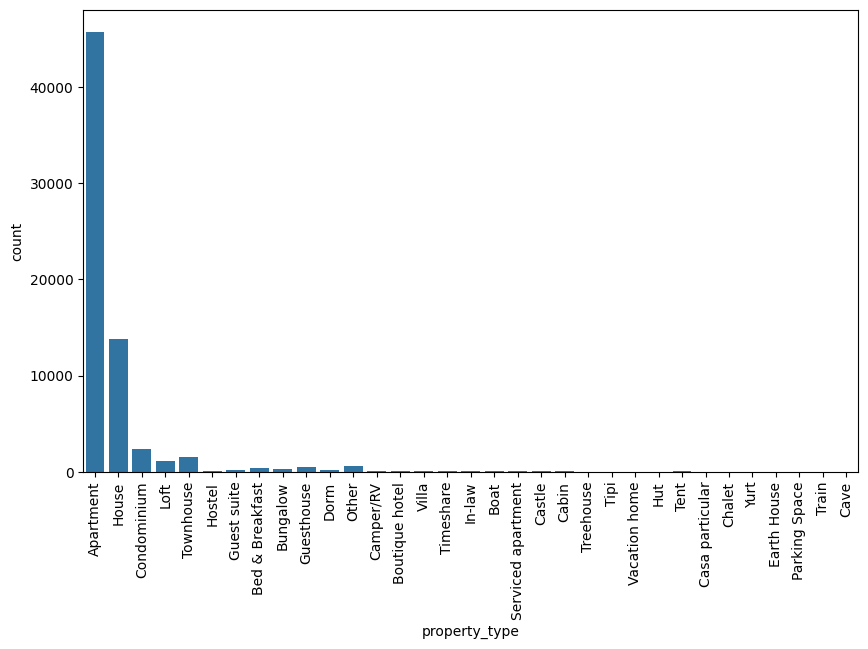

In [21]:
# create a graph of count of property_type

plt.figure(figsize=(10,6))
sns.countplot(x='property_type',data=da)
plt.xticks(rotation=90)
plt.show()


Its look like Apartments are more available for rents in UK.

# Changing Property type field to property_group
Because Property_type have many columns which is hard for us to use any encoding technique.

In [22]:
# Define dictionaries to map specific property types to broader groups
property_type_dict1 = {
    'Apartment': ['Condominium', 'Loft', 'Serviced apartment'],
    'House': ['Vacation home', 'Villa', 'Townhouse', 'In-law', 'Casa particular','Earth House', 'Bungalow'],
    'Hotel': ['Guesthouse', 'Bed & Breakfast', 'Guest suite', 'Timeshare', 'Boutique hotel', 'Castle', 'Hostel'],
    'Other': ['Dorm', 'Camper/RV', 'Boat', 'Tent', 'Yurt', 'Hut','Treehouse', 'Tipi', 'Cave', 'Train', 'Parking Space',
              'Lighthouse', 'Island','Cabin', 'Chalet']
}

# Create a dictionary to map individual property types to broader groups
property_type_dict2 = {individual_type: broader_group
                       for broader_group, specific_types in property_type_dict1.items()
                       for individual_type in specific_types}

# Map the property types to broader groups and create a new 'property_group' column
da['property_group'] = da['property_type'].replace(property_type_dict2)

# Drop the original 'property_type' column
da.drop('property_type', axis=1, inplace=True)

# Print the unique values in the new 'property_group' column
print('---------------------------------------')
print(da['property_group'].unique())


---------------------------------------
['Apartment' 'House' 'Hotel' 'Other']


C:\Users\kirito\AppData\Local\Temp\ipykernel_3316\2188998488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=da, x=h, y=v, palette='GnBu_d')


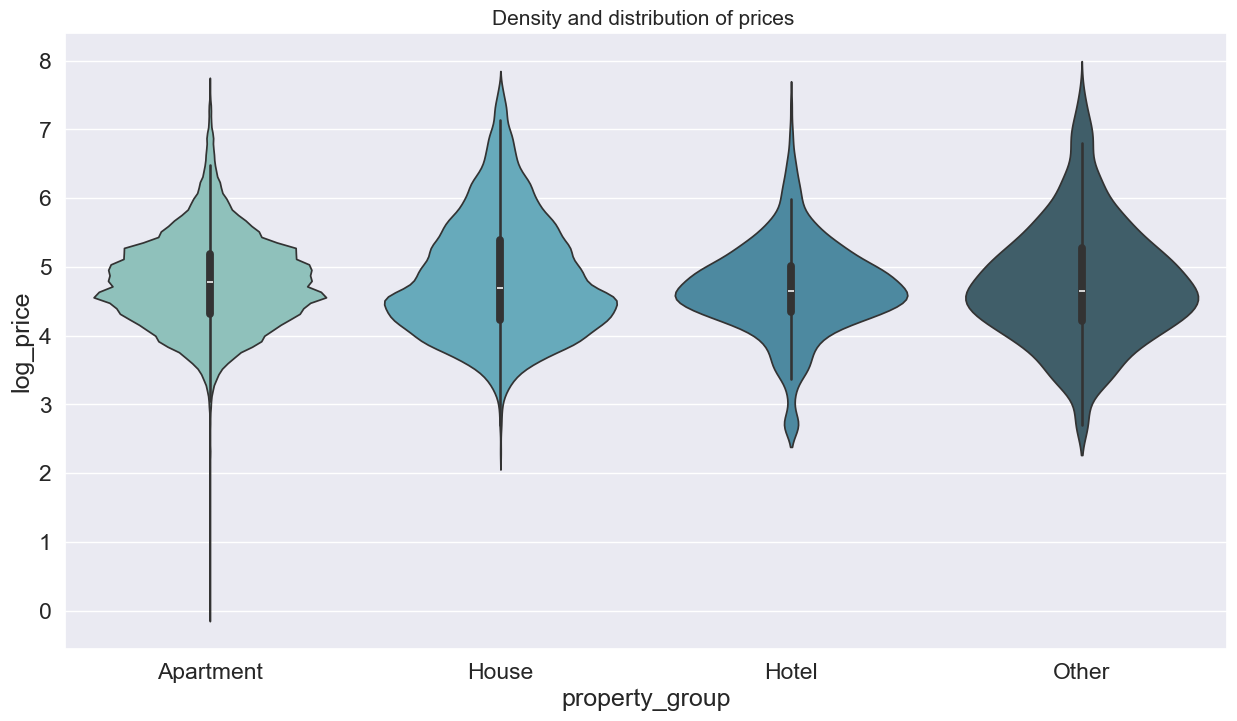

In [23]:
plot_violinplot("property_group","log_price")

In [24]:
def col_price(column):
  plot_data = pd.DataFrame({
      'data': da[column],
      'log_price': da.log_price
  })
  sns.countplot(x="data", data=plot_data)
  plt.title(column+' with log price')
  plt.show()


  plt.figure(figsize=(12,8))
  g = sns.boxplot(data=plot_data,orient='v', x = 'data', y = 'log_price')
  plt.title(column+' with log price')
  plt.show()
  return g

# What the graph said

The graph shows that the distribution of log_price varies across different property groups.

- **Apartments:** The distribution of log_price for apartments is relatively symmetric, with a peak around 4.5. This suggests that apartments tend to have a wide range of prices, with some being relatively affordable and others being more expensive.
- **Houses:** The distribution of log_price for houses is also relatively symmetric, but it is shifted slightly to the right compared to the distribution for apartments. This suggests that houses tend to be more expensive than apartments on average.
- **Hotels:** The distribution of log_price for hotels is skewed to the right, with a peak around 5. This suggests that there are a relatively small number of very expensive hotels, while most hotels are priced more affordably.
- **Other:** The distribution of log_price for other types of properties is also skewed to the right, but it is more spread out than the distribution for hotels. This suggests that there is a wide range of prices for other types of properties, from relatively affordable to very expensive.

Overall, the graph shows that the type of property can have a significant impact on its price.

In [25]:
# Print the count of each unique property type
print(da.property_group.value_counts())

property_group
Apartment    49356
House        15823
Hotel         1180
Other          880
Name: count, dtype: int64


# Room_type

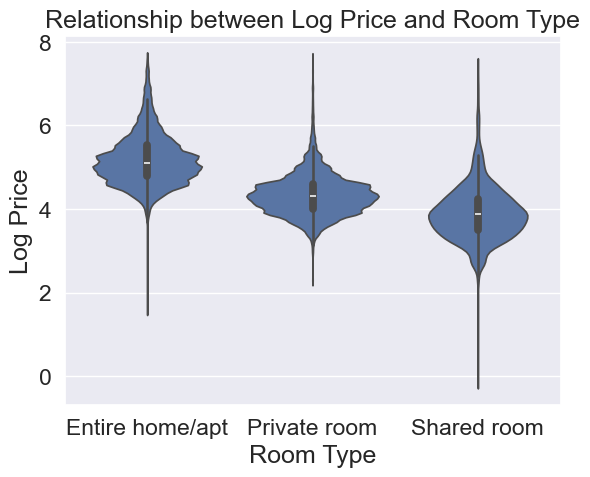

In [26]:
# graph to show the relation between log_price and room_type

# Create a violin plot of log_price by room_type
sns.violinplot(x="room_type", y="log_price", data=da)

# Add title and labels
plt.title("Relationship between Log Price and Room Type")
plt.xlabel("Room Type")
plt.ylabel("Log Price")

# Show the plot
plt.show()


# What the above graph said

The graph shows that the distribution of log_price varies across different room types.

- **Entire home/apt:** The distribution of log_price for entire homes/apartments is relatively symmetric, with a peak around 4.5. This suggests that entire homes/apartments tend to have a wide range of prices, with some being relatively affordable and others being more expensive.
- **Private room:** The distribution of log_price for private rooms is also relatively symmetric, but it is shifted slightly to the left compared to the distribution for entire homes/apartments. This suggests that private rooms tend to be less expensive than entire homes/apartments on average.
- **Shared room:** The distribution of log_price for shared rooms is skewed to the right, with a peak around 3.5. This suggests that there are a relatively small number of very expensive shared rooms, while most shared rooms are priced more affordably.

Overall, the graph shows that the type of room can have a significant impact on its price.


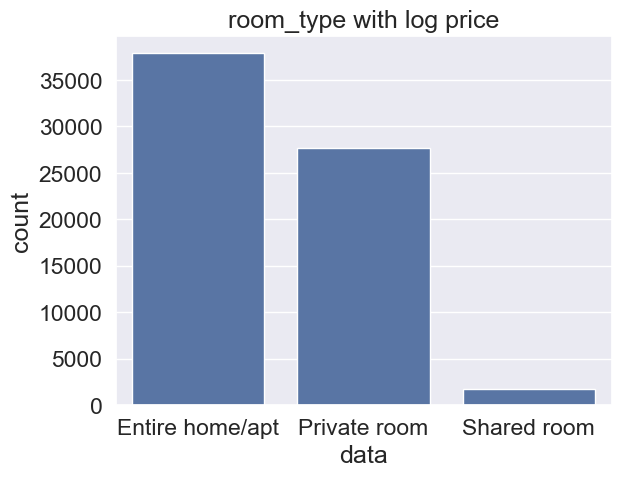

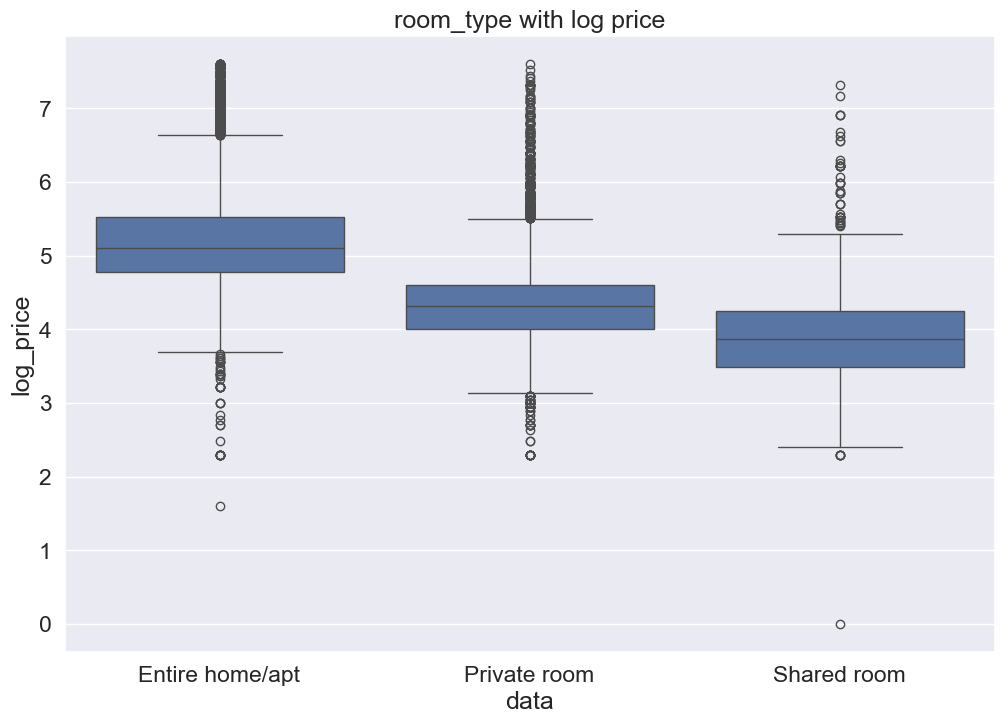

<Axes: title={'center': 'room_type with log price'}, xlabel='data', ylabel='log_price'>

In [27]:
col_price('room_type')

# cancellation_policy

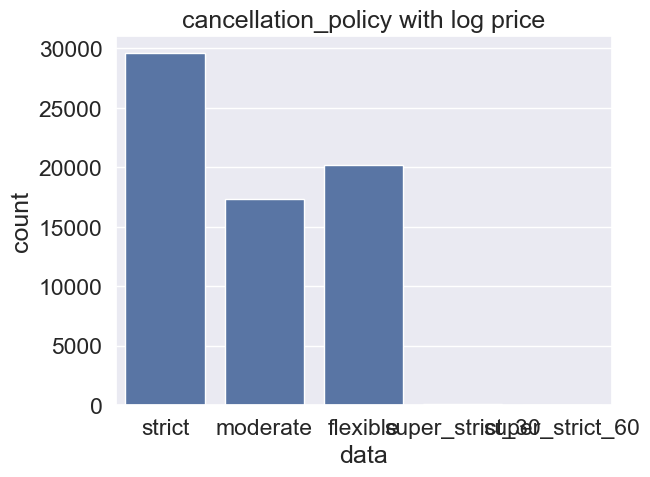

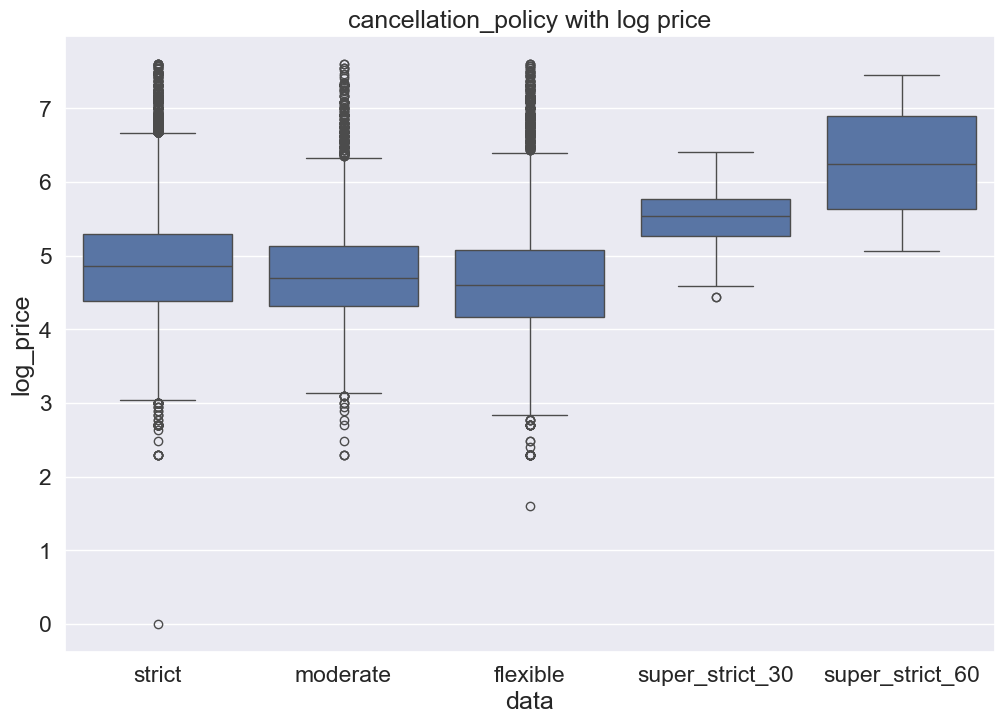

<Axes: title={'center': 'cancellation_policy with log price'}, xlabel='data', ylabel='log_price'>

In [28]:
col_price('cancellation_policy')

In [29]:
# Print the count of each unique cancellation_policy
print(da.cancellation_policy.value_counts())

cancellation_policy
strict             29595
flexible           20203
moderate           17329
super_strict_30      102
super_strict_60       10
Name: count, dtype: int64


# bed_type

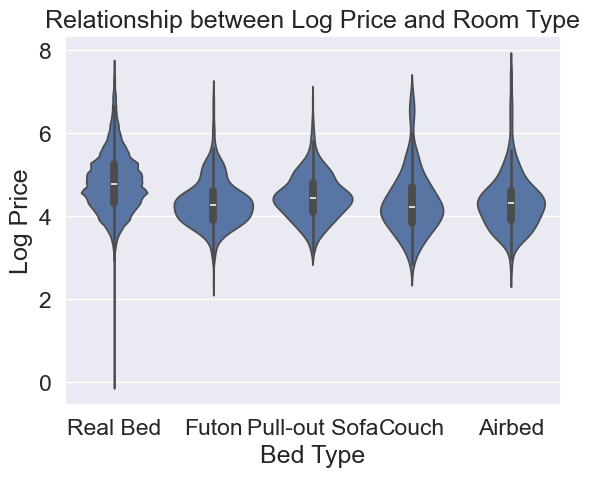

In [30]:
# graph to show the relation between log_price and bed_type

# Create a violin plot of log_price by room_type
sns.violinplot(x="bed_type", y="log_price", data=da)

# Add title and labels
plt.title("Relationship between Log Price and Room Type")
plt.xlabel("Bed Type")
plt.ylabel("Log Price")

# Show the plot
plt.show()

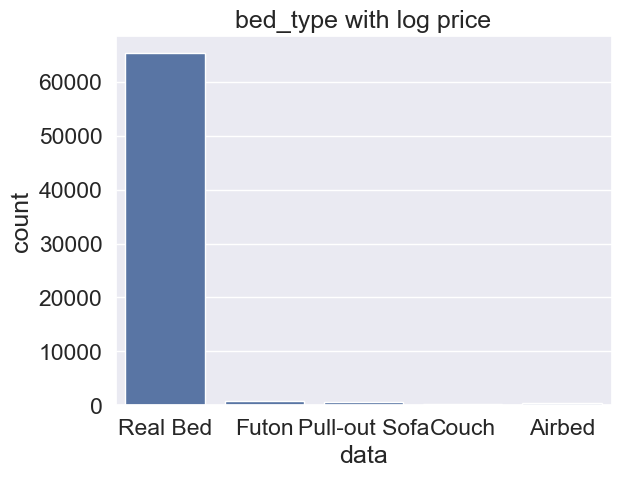

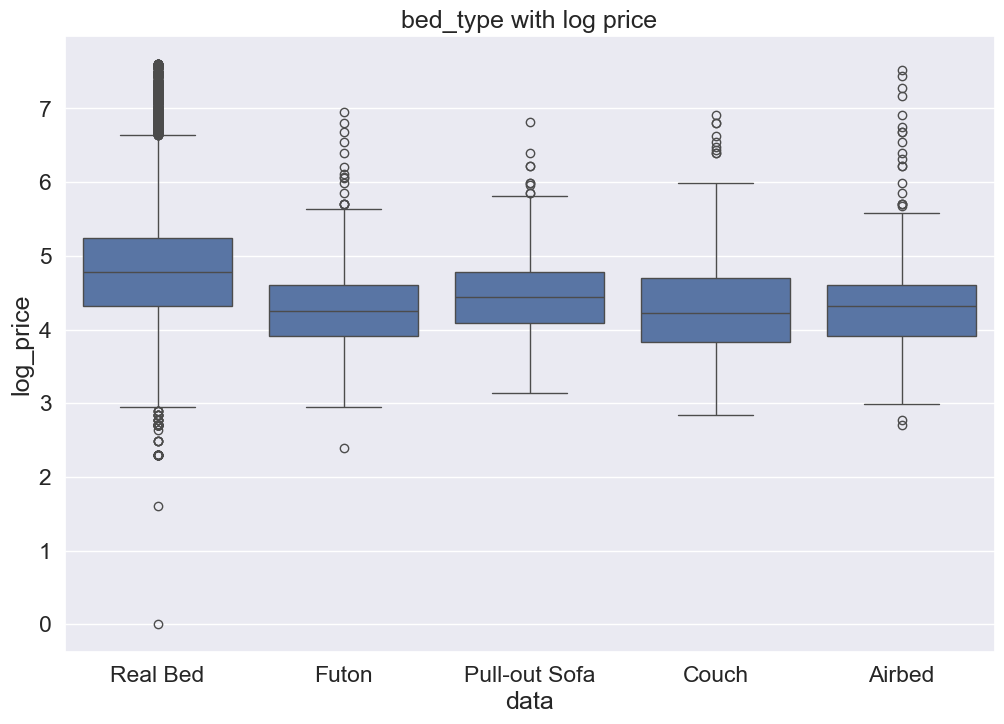

<Axes: title={'center': 'bed_type with log price'}, xlabel='data', ylabel='log_price'>

In [31]:
col_price('bed_type')

# city

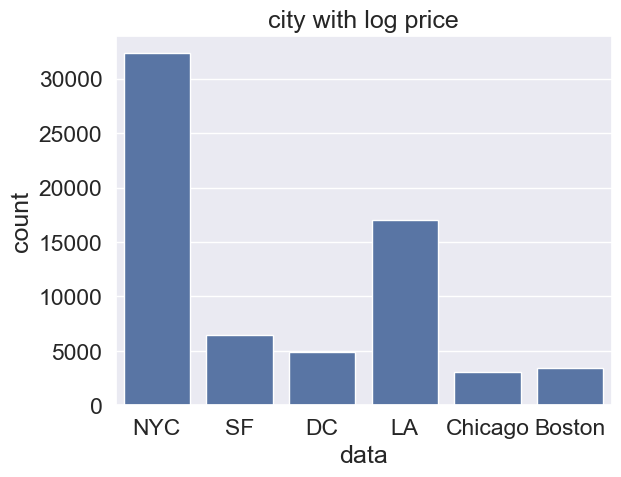

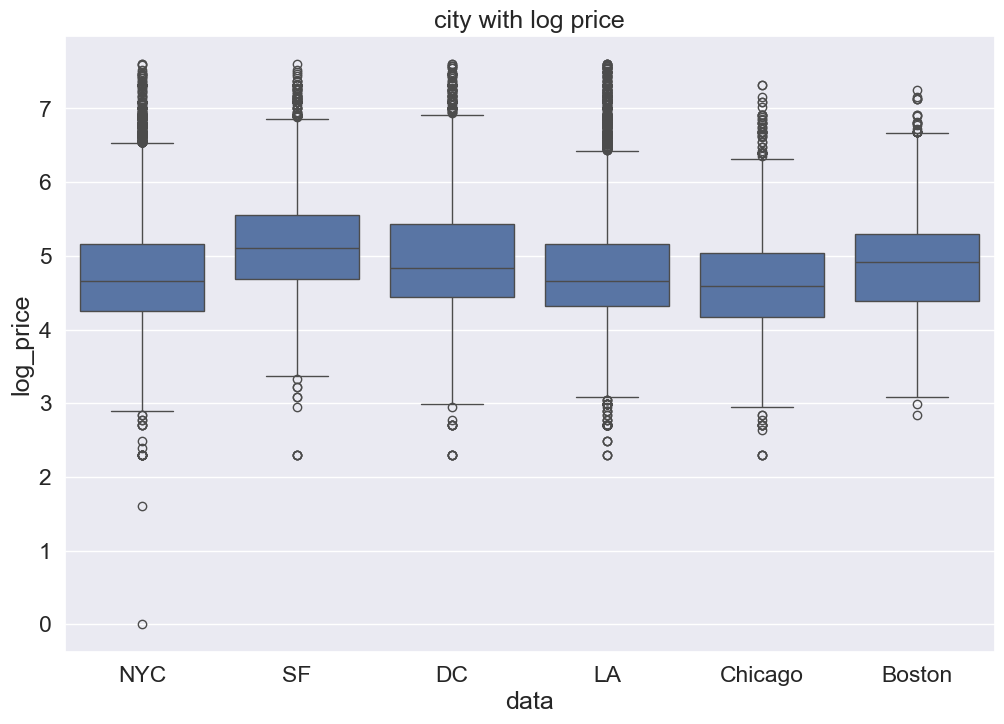

<Axes: title={'center': 'city with log price'}, xlabel='data', ylabel='log_price'>

In [32]:
col_price("city")

# Most popular Neighbourhood

<BarContainer object of 10 artists>

<Figure size 1000x1000 with 0 Axes>

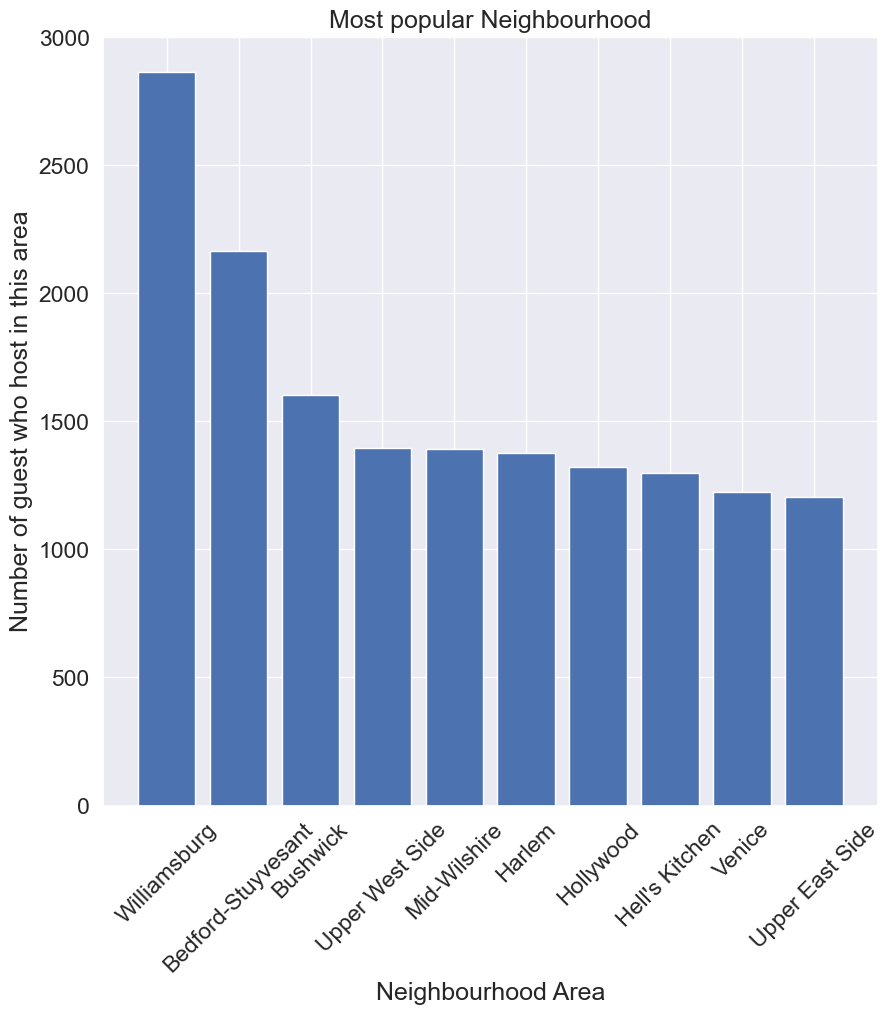

In [33]:
plt.figure(figsize = (10,10))
data = da.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10,10))
x = data.index
y = data.values

plt.title("Most popular Neighbourhood")
plt.xlabel("Neighbourhood Area")
plt.ylabel("Number of guest who host in this area")
plt.xticks(rotation=45)
plt.bar(x,y)

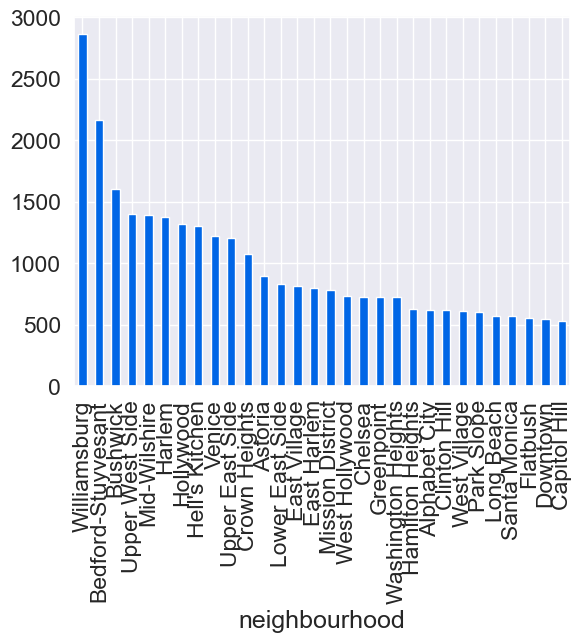

In [34]:
# Adding price per room field (For neighnourhood price level)
da['price_per_room'] = da['log_price'] / da['bedrooms']

da.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = da[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()

In [35]:
neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

print(neighbourhood_avg_price.sort_values(ascending=False))
print('---------------------------------------')
print(neighbourhood_avg_price.describe())

neighbourhood
Wilmington           7.170120
Harvard Square       5.480639
Coolidge Corner      5.416100
Government Center    5.357209
Lighthouse HIll      5.298317
                       ...   
Chevy Chase, MD      1.426180
Castleton Corners    1.398678
West Athens          1.288258
Rossville            1.100252
Mill Basin           1.035768
Name: price_per_room, Length: 619, dtype: float64
---------------------------------------
count    619.000000
mean       3.631428
std        0.494124
min        1.035768
25%        3.631428
50%        3.631428
75%        3.631428
max        7.170120
Name: price_per_room, dtype: float64


In [36]:
neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

pandas.core.frame.DataFrame

In [37]:
# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.683610:
    return 1
  elif row['price_per_room'] > 3.6836100 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
neighbourhood_class_df['neigbourhood_level'] = neighbourhood_class_df.apply(neigbourhood_class,axis=1)

In [38]:
neighbourhood_class_df.sort_values(by='neigbourhood_level',ascending=False)

,price_per_room,neigbourhood_level
neighbourhood,,
Kingsbridge,4.333299,4
Rolling Hills,4.499810,4
Mt. Pleasant,4.477337,4
Ivy City,4.474325,4
Dongan Hills,4.430817,4
...,...,...
Wakefield,3.631428,1
Washington Heights,3.631428,1
West Adams,3.631428,1


In [39]:
neighbourhood_class_df.drop('price_per_room',axis=1,inplace=True)

In [40]:
# Joining between the Main Data Frame and the  neighbourhood_class data frame to get neighbourhood class
da = da.join(neighbourhood_class_df,on='neighbourhood')

In [41]:
da.head()

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,property_group,price_per_room,neigbourhood_level
0,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0,Apartment,5.010635,1
1,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0,Apartment,1.709966,1
2,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,...,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0,Apartment,4.976734,1
3,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,...,37.772004,-122.431619,Lower Haight,0,NaN,2.0,2.0,House,3.310037,1
4,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",...,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0,Apartment,inf,1


In [42]:
da.shape

(67239, 23)

In [43]:
da["neigbourhood_level"].value_counts()

neigbourhood_level
1    66257
2      447
3      319
4      216
Name: count, dtype: int64

# Amenities


Let's take a closer look at the contents of amenities - logic dictates that this field should be an important predictive factor - we need to break it down into parts.

<BarContainer object of 21 artists>

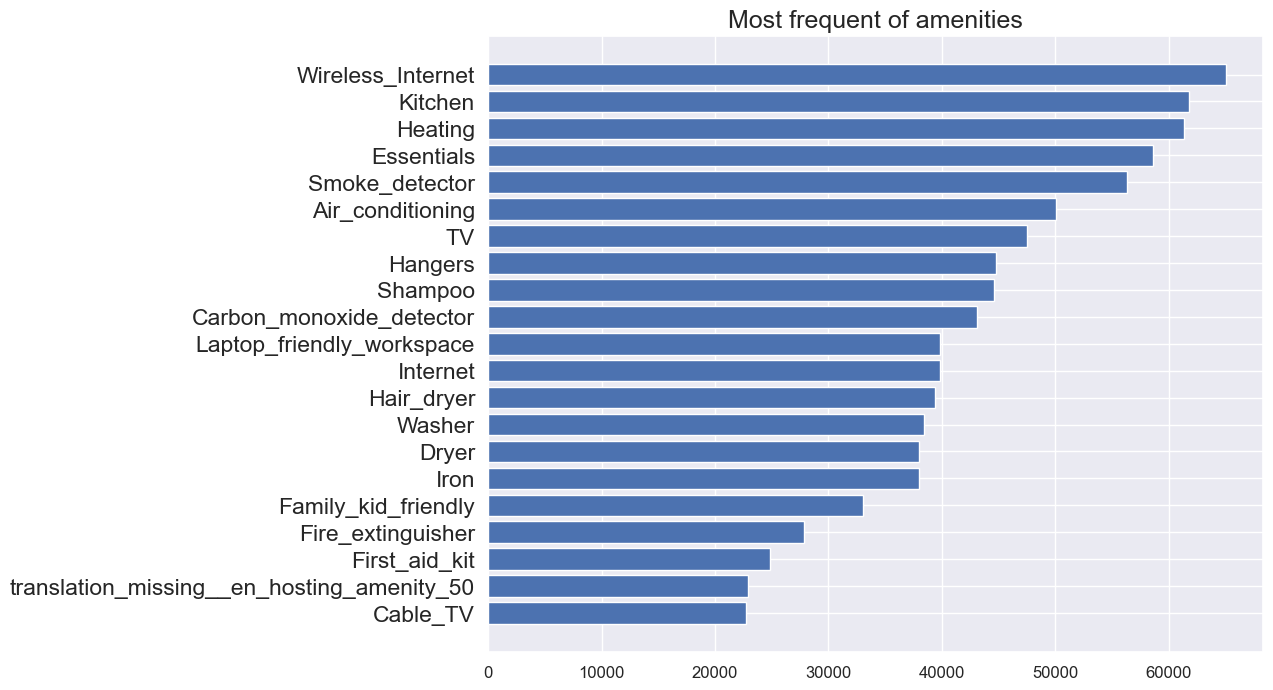

In [44]:
def extract_list_val(s):
    for c in ['{','}','"']:
        s=s.replace(c,'')
    for c in ['/',':',' ','-','.','&',')','(','\'']:
        s=s.replace(c,'_')
    s=s.replace('matress','mattress')
    return s.split(',')

xxx = da['amenities'].apply(extract_list_val)

amenities_col = []
amenities_map = {}

for s in xxx:
    amenities_col.append(max(len(s)-1,0))
    for k in s:
        if amenities_map.get(k) != None:
          amenities_map[k] +=1
        else:
          amenities_map[k] = 1

sorted_values = sorted(amenities_map.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in amenities_map.keys():
        if amenities_map[k] == i:
            sorted_dict[k] = amenities_map[k]
            break

keys = sorted_dict.keys()
values = sorted_dict.values()

plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
n = 21
plt.title( 'Most frequent of amenities')
plt.barh(list(keys)[-n:], list(values)[-n:], align='center')


In modern conditions, wireless Internet is more common than the kitchen

In [ ]:
# Changing amenities field to booleans seperated fields

l=list(da['amenities'])
l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in list(da['amenities'])]
cols = list(set(word for row in l  for word in row))
amenities_df=pd.DataFrame(columns=cols)
print(cols)
amenities_df = pd.DataFrame(columns=cols)
for row_idx in range(len(l)):
    for col in cols:
        amenities_df.loc[row_idx,col]=int(col in l[row_idx])l
amenities_df.head()

['', 'Bed linens', 'Cat(s)', 'Oven', 'Ethernet connection', 'Air conditioning', 'smooth pathway to front door', 'Accessible-height bed', 'Cleaning before checkout', 'Children’s dinnerware', 'Grab-rails for shower and toilet', 'Changing table', 'Bath towel', 'Hot water', 'Elevator in building', 'Step-free access', 'Flat', 'TV', 'Lock on bedroom door', 'Window guards', 'Game console', 'Hand soap', 'Pack ’n Play/travel crib', 'Ski in/Ski out', 'Accessible-height toilet', 'Wide entryway', 'Table corner guards', 'Keypad', 'Dishwasher', 'Heating', 'Fireplace guards', 'Fire extinguisher', 'EV charger', 'Path to entrance lit at night', 'Smoking allowed', 'Wide clearance to shower and toilet', 'Kitchen', 'Hair dryer', 'Free parking on premises', 'Outlet covers', 'Wide clearance to shower & toilet', 'Garden or backyard', 'Other', 'Baby bath', 'Doorman', 'Smartlock', 'Family/kid friendly', 'Cooking basics', 'Wide hallway clearance', 'Breakfast', 'Children’s books and toys', 'Washer / Dryer', 'Pri

In [ ]:
# Building a new field aggregating fields from amenities_df
# The new fields will be: kitchen, accesibility, Electricity_and_Technology, facilities, kids_friendly, security, services

amenities_group_df = pd.DataFrame()
#--------------------------------------
amenities_group_df['kitchen'] = amenities_df['Kitchen']+amenities_df['Breakfast']+amenities_df['Cooking basics']+amenities_df['Cooking basics']+amenities_df['BBQ grill']+amenities_df['Oven']+amenities_df['Coffee maker']+amenities_df['Microwave']+amenities_df['Refrigerator']+amenities_df['Dishwasher']
amenities_group_df['accesibility'] = amenities_df['Free parking on premises']+amenities_df['Wide clearance to bed']+amenities_df['smooth pathway to front door']+amenities_df['Ground floor access']+amenities_df['Lake access']+amenities_df['Wheelchair accessible']+amenities_df['Wide clearance to shower & toilet']+amenities_df['Wide hallway clearance']+amenities_df['Wide doorway']+amenities_df['Accessible-height toilet']+amenities_df['Step-free access']+amenities_df['Well-lit path to entrance']+amenities_df['Waterfront']+amenities_df['Free parking on street']+amenities_df['Disabled parking spot']+amenities_df['Accessible-height bed']+amenities_df['Private entrance']+amenities_df['Elevator']
amenities_group_df['Elect_Tech'] = amenities_df['Wide entryway']+amenities_df['Air conditioning']+amenities_df['Ethernet connection']+amenities_df['Cable TV']+amenities_df['Internet']+amenities_df['EV charger']+amenities_df['Baby monitor']+amenities_df['TV']+amenities_df['Wireless Internet']+amenities_df['Pocket wifi']+amenities_df['Washer']+amenities_df['Dryer']+amenities_df['Keypad']+amenities_df['Game console']+amenities_df['Washer / Dryer']+amenities_df['Hair dryer']
amenities_group_df['facilities'] = amenities_df['Private living room']+amenities_df['Air purifier']+amenities_df['Handheld shower head']+amenities_df['Hot water kettle']+amenities_df['Extra pillows and blankets']+amenities_df['Hot tub']+amenities_df['Pets live on this property']+amenities_df['Heating']+amenities_df['Dishes and silverware']+amenities_df['Patio or balcony']+amenities_df['Bed linens']+amenities_df['First aid kit']+amenities_df['Crib']+amenities_df['Flat']+amenities_df['Laptop friendly workspace']+amenities_df['Buzzer/wireless intercom']+amenities_df['Firm mattress']+amenities_df['Iron']+amenities_df['Changing table']+amenities_df['Hangers']+amenities_df['Roll-in shower with chair']+amenities_df['Gym']+amenities_df['Outlet covers']+amenities_df['Essentials']+amenities_df['Private bathroom']+amenities_df['Baby bath']+amenities_df['Bathtub']+amenities_df['Shampoo']+amenities_df['Beachfront']+amenities_df['Single level home']+amenities_df['Hot water']+amenities_df['High chair']+amenities_df['Bathtub with shower chair']+amenities_df['Pool']+amenities_df['Fixed grab bars for shower & toilet']+amenities_df['Room-darkening shades']+amenities_df['Beach essentials']+amenities_df['Garden or backyard']
amenities_group_df['kids_friendly'] = amenities_df['Babysitter recommendations']+amenities_df['Family/kid friendly']+amenities_df['Children’s books and toys']+amenities_df['Children’s dinnerware']
amenities_group_df['security'] = amenities_df['Window guards']+amenities_df['Stair gates']+amenities_df['Fireplace guards']+amenities_df['Doorman']+amenities_df['Carbon monoxide detector']+amenities_df['Smoke detector']+amenities_df['Table corner guards']+amenities_df['Fire extinguisher']+amenities_df['Lock on bedroom door']+amenities_df['Smart lock']+amenities_df['Lockbox']
amenities_group_df['services'] = amenities_df['Ski in/Ski out']+amenities_df['Cleaning before checkout']+amenities_df['Long term stays allowed']+amenities_df['Other pet(s)']+amenities_df['Cat(s)']+amenities_df['Self Check-In']+amenities_df['24-hour check-in']+amenities_df['Host greets you']+amenities_df['Luggage dropoff allowed']+amenities_df['Pack ’n Play/travel crib']+amenities_df['Pets allowed']+amenities_df['Suitable for events']+amenities_df['Safety card']+amenities_df['Indoor fireplace']+amenities_df['Dog(s)']+amenities_df['Smoking allowed']

In [ ]:
amenities_group_df.head()

In [ ]:
# This field will use to join between nyc data frame and amenities_group data frame
da['join_key'] = range(0,len(da))
da.index = da['join_key']

In [ ]:
# Joining between the main data set and the data set based on amenities field
da = da.join(amenities_group_df)

In [ ]:
da.columns

In [ ]:
da.drop(["join_key"],axis=1,inplace=True)

In [ ]:
from datetime import datetime

In [ ]:
# Calculate the difference between today's date and last_review date
today = datetime.now()
da['Days_Since_Last_Review'] = (today - da['last_review']).dt.days

# Display the DataFrame with the new column
print(da[['last_review', 'Days_Since_Last_Review']].head())

# Longtitude & Latitude

In [ ]:
# Using Longtitude and Latitude fields to create 0-1 scale (North to South / West to East)

plt.scatter(da.longitude,da.latitude,c = da.log_price)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title('log_price on Map', x=0.5, y=1.05, ha='center', fontsize='xx-large')

In [ ]:
da.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(15,10),
    c="log_price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [ ]:
import plotly.express as px

# Step 1: Visualize Price Distribution
fig = px.scatter_mapbox(da, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="neighbourhood",  # Optional: Display neighbourhood names on hover
                        hover_data=["log_price"],        # Optional: Display price on hover
                        color="log_price",              # Optional: Color points by price
                        size="log_price",               # Optional: Size points by price
                        zoom=10)
fig.update_layout(
    title="Price Distribution",
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
        }
    ]
)

# Step 2: Customize the Layout (if needed)
fig.update_layout(
    width=1000, 
    height=600,
    geo_scope='world'  # Adjust the scope as per your data (e.g., 'usa' for the United States)
)

# Step 3: Show the map
fig.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text in the 'description' column
def preprocess_description(description):
    # Tokenize text
    tokens = word_tokenize(description.lower())
    
    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    
    # Join tokens back into text
    preprocessed_description = ' '.join(tokens)
    
    return preprocessed_description

# Apply preprocessing to the 'description' column
da['preprocessed_description'] = da['description'].apply(preprocess_description)

# Example: Print preprocessed descriptions
print(da['preprocessed_description'].head())

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each description
da['sentiment_score'] = da['preprocessed_description'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Step 3: Train-Test Split
X = da[['sentiment_score']]  # Feature matrix (sentiment scores)
y = da['log_price']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Predictive Model
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Step 5: Evaluate Model
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
da[["log_price",'sentiment_score']]

In [ ]:
da.drop(['amenities','cancellation_policy','description', 'first_review', 'host_since', 'last_review', 'latitude',
       'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating','price_per_room','sentiment_score'],axis=1,inplace = True)

# Numerical data

In [ ]:
numerical_columns = da.select_dtypes(include=['int', 'float']).columns
print("Columns with numerical data:")
print(numerical_columns)

In [ ]:

columns_to_plot = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',]

# Plot histograms for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

All numerical data is right skewed

In [ ]:
numerical_columns = ['bathrooms', 'bedrooms', 'beds']

# Fill missing values with the median for numerical columns
for column in numerical_columns:
    median_value = da[column].median()
    da[column].fillna(median_value, inplace=True)

# List of categorical columns
categorical_columns = ['kitchen', 'accesibility', 'Elect_Tech', 'facilities', 'kids_friendly', 'security', 'services']

# Fill missing values with the mode for categorical columns
for column in categorical_columns:
    mode_value = da[column].mode()[0]  # Using mode to handle categorical data
    da[column].fillna(mode_value, inplace=True)

# Confirm that there are no missing values left in these columns
print("Number of missing values after filling with median and mode:")
print(da.isnull().sum())

In [ ]:
da.info()

In [ ]:
# Convert boolean values to integer (0 and 1)
da["cleaning_fee"] = da["cleaning_fee"].astype(int)

In [ ]:
da["cleaning_fee"]

# make dummy variables

In [ ]:
# Filter columns with data type 'object'
object_columns = da.select_dtypes(include=['object'])

# Count unique values in columns with data type 'object'
unique_value_counts_object = object_columns.nunique()

# Print the count of unique values in columns with data type 'object'
print("Count of unique values in columns with data type 'object':")
print(unique_value_counts_object)

In [ ]:
# List of categorical columns
categorical_columns = ['room_type', 'bed_type', 'city', 'property_group']

# Create dummy variables for categorical columns
dummy_columns = pd.get_dummies(da[categorical_columns], drop_first=True)

# Concatenate the dummy columns with the original DataFrame
da = pd.concat([da, dummy_columns], axis=1)

# Drop the original categorical columns
da.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
da.columns

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains features and y contains the target variable (log_price)
X = da.drop('log_price', axis=1)
y = da['log_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model - Simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Baseline Model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Baseline Model - Linear Regression:")
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

# RandomForest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate RandomForest Model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandomForest Model:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

# GradientBoosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate GradientBoosting Model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("\nGradientBoosting Model:")
print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Define parameter grids for each model
lr_param_grid = {'fit_intercept': [True, False]}
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
gb_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_param_grid, cv=kf)
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_

# Grid Search for RandomForest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=kf)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Grid Search for GradientBoosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=kf)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

# Evaluate best models
lr_best_predictions = lr_best_model.predict(X_test)
rf_best_predictions = rf_best_model.predict(X_test)
gb_best_predictions = gb_best_model.predict(X_test)

lr_best_mse = mean_squared_error(y_test, lr_best_predictions)
rf_best_mse = mean_squared_error(y_test, rf_best_predictions)
gb_best_mse = mean_squared_error(y_test, gb_best_predictions)

print("Best Model - Linear Regression:")
print("Mean Squared Error:", lr_best_mse)

print("\nBest Model - RandomForest:")
print("Mean Squared Error:", rf_best_mse)

print("\nBest Model - GradientBoosting:")
print("Mean Squared Error:", gb_best_mse)


In [ ]:
import shap

# Train RandomForest model
rf_model.fit(X_train, y_train)

# Train GradientBoosting model
gb_model.fit(X_train, y_train)

# Compute SHAP values for RandomForest model
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Compute SHAP values for GradientBoosting model
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_train)

# Plot feature importance for RandomForest
shap.summary_plot(shap_values_rf, X_train, plot_type="bar", show=False)
plt.title("Feature Importance - RandomForest")
plt.show()

# Plot feature importance for GradientBoosting
shap.summary_plot(shap_values_gb, X_train, plot_type="bar", show=False)
plt.title("Feature Importance - GradientBoosting")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Evaluate the final model on the test set
rf_test_predictions = rf_model.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, rf_test_predictions, squared=False)
r_squared = r2_score(y_test, rf_test_predictions)

print("Performance Metrics on Test Set:")
print("RMSE:", rmse)
print("R-squared:", r_squared)

# Analyze residuals
residuals = y_test - rf_test_predictions

# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rf_test_predictions, y=residuals, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
